In [238]:
import numpy as np
from random import randint
import random
import networkx as nx
import matplotlib.pyplot as plt
import keyboard
import pygame
import sys
import math
import copy

JEU DE DAMME

In [245]:
class Dame:
    """
    Classe du jeu des dames
    """

    def __init__(self):

        self.plateau = [[0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1],
                        [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0],
                        [0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1],
                        [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0]]

        """self.plateau = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 2.1, 0, 2.1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1.2, 0, 0, 0, 0, 0, 0],
                        [0, 0, 2.1, 0, 2.1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 2.1, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 0],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0]]"""

        self.tour = 1

        # Chargement des images.
        self.p_blanc = pygame.image.load("pion_blanc.png")
        self.p_noir = pygame.image.load("pion-noir.png")
        self.d_blanc = pygame.image.load("dame_blanc.png")
        self.d_noir = pygame.image.load("dame_noir.png")

        self.click_gauche = 0

# Cet fonction reset le jeu (plateau et tour)
    def reset(self):
        self.plateau = [[0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1],
                        [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0],
                        [0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1],
                        [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0],
                        [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1],
                        [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0]]

        self.tour = 1
        self.click_gauche = 0

#Cet fonction permet de savoir si le pion peut avancer du côté gauche du plateau
    def p_peut_avancer_gauche(self, x, y):
        if self.tour == 1 and x != 0 and self.plateau[y-1][x-1] == 0:
            return 1
        if self.tour == 2 and x != 0 and self.plateau[y+1][x-1] == 0:
            return 1
        return 0

#Cet fonction permet de savoir si le pion peut avancer du côté droit du plateau
    def p_peut_avancer_droite(self, x, y):
        if self.tour == 1 and x != 9 and self.plateau[y-1][x+1] == 0:
            return 1
        if self.tour == 2 and x != 9 and self.plateau[y+1][x+1] == 0:
            return 1
        return 0

#Cet fonction permet de savoir si le pion peut manger en haut à gauche du plateau
    def p_peut_manger_haut_gauche(self, x, y):
        if x > 1 and y > 1 and self.plateau[y - 2][x - 2] == 0 != self.plateau[y - 1][x - 1]:
            if self.tour == 1 and self.plateau[y - 1][x - 1] > 2:
                return 1
            if self.tour == 2  and 2 > self.plateau[y - 1][x - 1] > 0:
                return 1
        return 0

#Cet fonction permet de savoir si le pion peut manger en haut à droite du plateau
    def p_peut_manger_haut_droit(self, x, y):
        if x < 8 and y > 1 and self.plateau[y - 2][x + 2] == 0 != self.plateau[y - 1][x + 1]:
            if self.tour == 1 and self.plateau[y - 1][x + 1] > 2:
                return 1
            if self.tour == 2  and 2 > self.plateau[y - 1][x + 1] > 0:
                return 1
        return 0

#Cet fonction permet de savoir si le pion peut manger en bas à gauche du plateau
    def p_peut_manger_bas_gauche(self, x, y):
        if x > 1 and y < 8 and self.plateau[y + 2][x - 2] == 0 != self.plateau[y + 1][x - 1]:
            if self.tour == 1 and self.plateau[y + 1][x - 1] > 2:
                return 1
            if self.tour == 2  and 2 > self.plateau[y + 1][x - 1] > 0:
                return 1
        return 0

#Cet fonction permet de savoir si le pion peut manger en bas à droite du plateau
    def p_peut_manger_bas_droit(self, x, y):
        if x < 8 and y < 8 and self.plateau[y + 2][x + 2] == 0 != self.plateau[y + 1][x + 1]:
            if self.tour == 1 and self.plateau[y + 1][x + 1] > 2:
                return 1
            if self.tour == 2  and 2 > self.plateau[y + 1][x + 1] > 0:
                return 1
        return 0

#Cet fonction permet d'vancer le pion du côté gauche du plateau
    def p_avancer_gauche(self, x, y):
        if self.tour == 1 and x != 0 and self.plateau[y-1][x-1] == 0:
            self.plateau[y-1][x-1] = self.plateau[y][x]
            self.plateau[y][x] = 0
        if self.tour == 2 and x != 0 and self.plateau[y+1][x-1] == 0:
            self.plateau[y+1][x-1] = self.plateau[y][x]
            self.plateau[y][x] = 0

#Cet fonction permet d'vancer le pion du côté droit du plateau
    def p_avancer_droite(self, x, y):
        if self.tour == 1 :
            self.plateau[y-1][x+1] = self.plateau[y][x]
            self.plateau[y][x] = 0
        if self.tour == 2 :
            self.plateau[y+1][x+1] = self.plateau[y][x]
            self.plateau[y][x] = 0

#Cet fonction permet au pion de manger en haut à gauche du plateau
    def p_manger_haut_gauche(self, x, y):
        self.plateau[y-2][x-2] = self.plateau[y][x]
        self.plateau[y][x] = self.plateau[y-1][x-1] = 0

#Cet fonction permet au pion de manger en haut à droite du plateau
    def p_manger_haut_droit(self, x, y):
        self.plateau[y-2][x+2] = self.plateau[y][x]
        self.plateau[y][x] = self.plateau[y-1][x+1] = 0

#Cet fonction permet au pion de manger en bas à gauche du plateau
    def p_manger_bas_gauche(self, x, y):
        self.plateau[y+2][x-2] = self.plateau[y][x]
        self.plateau[y][x] = self.plateau[y+1][x-1] = 0

#Cet fonction permet au pion de manger en bas à droite du plateau
    def p_manger_bas_droit(self, x, y):
        self.plateau[y+2][x+2] = self.plateau[y][x]
        self.plateau[y][x] = self.plateau[y+1][x+1] = 0

# Vérifie si une dame peut se déplacer en diagonale en haut à gauche et combien de pion sont mangés
    def dame_peut_avancer_haut_gauche(self, x, y, nb_case, x_evite, y_evite):
        nb_mange = 0
        x_mange = []
        y_mange = []
        if  (x - nb_case) >= 0 and  (y - nb_case) >= 0 and (self.plateau[y - nb_case][x - nb_case] == 0 or any((x-nb_case == xp and y-nb_case == yp) for xp, yp in zip(x_evite, y_evite))):
            for i in range (1, nb_case):
                peut_continuer = 1
                ignorer = 0
                if  any((x-i == xp and y-i == yp) for xp, yp in zip(x_evite, y_evite)):
                    peut_continuer = 0
                if  any((x-i-1 == xp and y-i-1 == yp) for xp, yp in zip(x_evite, y_evite)):
                    ignorer = 1
                if peut_continuer and ignorer == 0:
                    if self.tour == 1 and (1 < self.plateau[y - i][x - i] < 2 or self.plateau[y - i][x - i] == self.plateau[y - i - 1][x - i - 1] != 0):
                        return 0, 0, 0, 0
                    if self.tour == 2 and (self.plateau[y - i][x - i] > 2 or self.plateau[y - i][x - i] == self.plateau[y - i - 1][x - i - 1] != 0 ):
                        return 0, 0, 0, 0
                    if self.tour == 1 and self.plateau[y - i][x - i] > 2:
                        x_mange.append(x - i)
                        y_mange.append(y - i)
                        nb_mange+=1
                    if self.tour == 2 and 1 < self.plateau[y - i][x - i] < 2:
                        x_mange.append(x - i)
                        y_mange.append(y - i)
                        nb_mange+=1
            return 1, nb_mange+1, x_mange, y_mange
        return 0, 0, 0, 0

# Vérifie si une dame peut se déplacer en diagonale en haut à droite et combien de pion sont mangés
    def dame_peut_avancer_haut_droite(self, x, y, nb_case, x_evite, y_evite):
        nb_mange = 0
        x_mange = []
        y_mange = []
        if  (x + nb_case) <= 9 and  (y - nb_case) >= 0 and (self.plateau[y - nb_case][x + nb_case] == 0 or any((x+nb_case == xp and y-nb_case == yp) for xp, yp in zip(x_evite, y_evite))):
            for i in range (1, nb_case):
                peut_continuer = 1
                ignorer = 0
                if  any((x+i == xp and y-i == yp) for xp, yp in zip(x_evite, y_evite)):
                    peut_continuer = 0
                if  any((x+i+1 == xp and y-i-1 == yp) for xp, yp in zip(x_evite, y_evite)):
                    ignorer = 1
                if peut_continuer and ignorer == 0:
                    if self.tour == 1 and (1 < self.plateau[y - i][x + i] < 2 or (self.plateau[y - i][x + i] != 0 and self.plateau[y - i - 1][x + i + 1] != 0) ):
                        return 0, 0, 0, 0
                    if self.tour == 2 and (self.plateau[y - i][x + i] > 2 or self.plateau[y - i][x + i] == self.plateau[y - i - 1][x + i + 1] != 0 ):
                        return 0, 0, 0, 0
                    if self.tour == 1 and self.plateau[y - i][x + i] > 2:
                        x_mange.append(x + i)
                        y_mange.append(y - i)
                        nb_mange+=1
                    if self.tour == 2 and 1 < self.plateau[y - i][x + i] < 2:
                        x_mange.append(x + i)
                        y_mange.append(y - i)
                        nb_mange+=1
            return 1, nb_mange+1,x_mange, y_mange
        return 0, 0, 0, 0

# Vérifie si une dame peut se déplacer en diagonale en bas à gauche et combien de pion sont mangés
    def dame_peut_avancer_bas_gauche(self, x, y, nb_case, x_evite, y_evite):
        nb_mange = 0
        x_mange = []
        y_mange = []
        if  (x - nb_case) >= 0 and  (y + nb_case) <= 9 and (self.plateau[y + nb_case][x - nb_case] == 0 or any((x-nb_case == xp and y+nb_case == yp) for xp, yp in zip(x_evite, y_evite))):
            for i in range (1, nb_case):
                peut_continuer = 1
                ignorer = 0
                if  any((x-i == xp and y+i == yp) for xp, yp in zip(x_evite, y_evite)):
                    peut_continuer = 0
                if  any((x-i-1 == xp and y+i+1 == yp) for xp, yp in zip(x_evite, y_evite)):
                    ignorer = 1
                if peut_continuer and ignorer == 0:
                    if self.tour == 1 and (1 < self.plateau[y + i][x - i] < 2 or self.plateau[y + i][x - i] == self.plateau[y + i + 1][x - i - 1] != 0 ):
                        return 0, 0, 0, 0
                    if self.tour == 2 and (self.plateau[y + i][x - i] > 2 or self.plateau[y + i][x - i] == self.plateau[y + i + 1][x - i - 1] != 0):
                        return 0, 0, 0, 0
                    if self.tour == 1 and self.plateau[y + i][x - i] > 2:
                        x_mange.append(x - i)
                        y_mange.append(y + i)
                        nb_mange+=1
                    if self.tour == 2 and 1 < self.plateau[y + i][x - i] < 2:
                        x_mange.append(x - i)
                        y_mange.append(y + i)
                        nb_mange+=1
            return 1, nb_mange+1, x_mange, y_mange
        return 0, 0, 0, 0

# Vérifie si une dame peut se déplacer en diagonale en bas à doite et combien de pion sont mangés
    def dame_peut_avancer_bas_droite(self, x, y, nb_case, x_evite, y_evite):
        nb_mange = 0
        x_mange = []
        y_mange = []
        if  (x + nb_case) <= 9 and  (y + nb_case) <= 9 and (self.plateau[y + nb_case][x + nb_case] == 0 or any((x+nb_case == xp and y+nb_case == yp) for xp, yp in zip(x_evite, y_evite))):
            for i in range (1, nb_case):
                peut_continuer = 1
                ignorer = 0
                if  any((x+i == xp and y+i == yp) for xp, yp in zip(x_evite, y_evite)):
                    peut_continuer = 0
                if  any((x+i+1 == xp and y+i+1 == yp) for xp, yp in zip(x_evite, y_evite)):
                    ignorer = 1
                if peut_continuer and ignorer == 0:
                    if self.tour == 1 and (1 < self.plateau[y + i][x + i] < 2 or self.plateau[y + i][x + i] == self.plateau[y + i + 1][x + i + 1] != 0):
                        return 0, 0, 0, 0
                    if self.tour == 2 and (self.plateau[y + i][x + i] > 2 or self.plateau[y + i][x + i] == self.plateau[y + i + 1][x + i + 1] != 0):
                        return 0, 0, 0, 0
                    if self.tour == 1 and self.plateau[y + i][x + i] > 2:
                        x_mange.append(x + i)
                        y_mange.append(y + i)
                        nb_mange+=1
                    if self.tour == 2 and 1 < self.plateau[y + i][x + i] < 2:
                        x_mange.append(x + i)
                        y_mange.append(y + i)
                        nb_mange+=1
            return 1, nb_mange+1, x_mange, y_mange
        return 0, 0, 0, 0

# Cet fonction fait manger la dame en diagonale en haut à gauche
    def dame_avancer_haut_gauche(self, x, y, nb_case):
        self.plateau[y - nb_case][x - nb_case] = self.plateau[y][x]
        for i in range(nb_case):
            self.plateau[y - i][x - i] = 0

# Cet fonction fait manger la dame en diagonale en haut à droite
    def dame_avancer_haut_droite(self, x, y, nb_case):
        self.plateau[y - nb_case][x + nb_case] = self.plateau[y][x]
        for i in range(nb_case):
            self.plateau[y - i][x + i] = 0

# Cet fonction fait manger la dame en diagonale en bas à gauche
    def dame_avancer_bas_gauche(self, x, y, nb_case):
        self.plateau[y + nb_case][x - nb_case] = self.plateau[y][x]
        for i in range(nb_case):
            self.plateau[y + i][x - i] = 0

# Cet fonction fait manger la dame en diagonale en bas à droite
    def dame_avancer_bas_droite(self, x, y, nb_case):
        self.plateau[y + nb_case][x + nb_case] = self.plateau[y][x]
        for i in range(nb_case):
            self.plateau[y + i][x + i] = 0

#Cet fonction transforme les pions en dames si les conditions sont remplies
    def transformation_dame(self):
        for x in range(10):
            if self.plateau[0][x] == 1.1:
                self.plateau[0][x] = 1.2
            if self.plateau[9][x] == 2.1:
                self.plateau[9][x] = 2.2

#Cet fonction vérifie si le point de coordonnées x,y existe déjà dans le graphe pour les pions
    def sommet_existe_pour_pion(self, graph, x, y):
        for node, data in graph.nodes(data=True):
            if data['x'] == x and data['y'] == y and data['piece'] == 'pion':
                return True, node
        return False, None

 #Cet fonction vérifie si le point de coordonnées x,y existe déjà dans le graphe pour les dames
    def sommet_existe_pour_dame(self, graph, x, y):
        for node, data in graph.nodes(data=True):
            if data['x'] == x and data['y'] == y and data['piece'] == 'dame':
                return True, node
        return False, None

#Cet foction créer un graphes orienté des possibilitées de jeu.
    #Dans le graphe, les arrêtes valent 1 si il n'est pas possible de manger et 2 si il mange.
    def graphe_jeu(self):
        # Création d'un graphe orienté
        G = nx.DiGraph()

        num = 0
        pion = self.tour + 0.1
        dame = self.tour + 0.2

        for y in range (10):
            for x in range (10):
                if self.plateau[y][x] == pion:
                    # Ajout de nœuds au graphe
                    G.add_node(num, x = x, y = y, piece = 'pion', bouge = 0)
                    num+=1
                if self.plateau[y][x] == dame:
                    # Ajout de nœuds au graphe
                    G.add_node(num, x = x, y = y, piece = 'dame', bouge = 0, x_mange = [], y_mange = [])
                    num+=1

        s_traite = 0
        peut_manger = 0
        while s_traite < num:

            #Condition si le point est un pion
            if G.nodes[s_traite]['piece'] == 'pion' and (G.nodes[s_traite]['bouge'] == 0 or G.nodes[s_traite]['bouge'] == -1):

                x, y, piece, bouge = G.nodes[s_traite]['x'], G.nodes[s_traite]['y'], G.nodes[s_traite]['piece'], G.nodes[s_traite]['bouge']

                if self.p_peut_manger_haut_gauche(x, y):
                    existe, num_e = self.sommet_existe_pour_pion(G, x-2, y-2)
                    if not (G.has_edge(num_e, s_traite)):
                        if existe:
                            G.add_edge(s_traite, num_e, weight = 2, direction = 3)
                        else:
                            G.add_node(num, x = x-2, y = y-2, piece = 'pion', bouge = -1)
                            G.add_edge(s_traite, num, weight = 2, direction = 3)
                            num+=1
                        peut_manger = 1

                if self.p_peut_manger_haut_droit(x, y):
                    existe, num_e = self.sommet_existe_pour_pion(G, x+2, y-2)
                    if not (G.has_edge(num_e, s_traite)):
                        if existe:
                            G.add_edge(s_traite, num_e, weight = 2, direction = 4)
                        else:
                            G.add_node(num, x = x+2, y = y-2, piece = 'pion', bouge = -1)
                            G.add_edge(s_traite, num, weight = 2, direction = 4)
                            num+=1
                        peut_manger = 1

                if self.p_peut_manger_bas_gauche(x, y):
                    existe, num_e = self.sommet_existe_pour_pion(G, x-2, y+2)
                    if not (G.has_edge(num_e, s_traite)):
                        if existe:
                            G.add_edge(s_traite, num_e, weight = 2, direction = 5)
                        else:
                            G.add_node(num, x = x-2, y = y+2, piece = 'pion', bouge = -1)
                            G.add_edge(s_traite, num, weight = 2, direction = 5)
                            num+=1
                        peut_manger = 1

                if self.p_peut_manger_bas_droit(x, y):
                    existe, num_e = self.sommet_existe_pour_pion(G, x+2, y+2)
                    if not (G.has_edge(num_e, s_traite)):
                        if existe:
                            G.add_edge(s_traite, num_e, weight = 2, direction = 6)
                        else:
                            G.add_node(num, x = x+2, y = y+2, piece = 'pion', bouge = -1)
                            G.add_edge(s_traite, num, weight = 2, direction = 6)
                            num+=1
                        peut_manger = 1

                """
                Si il n'est pas possible de manger et que le pion n'a pas encore bougé, on regarde quelle pion peut bouger et où. Cependant, il est possible que dans le graphe final il soit possible de manger et pourtant que les sommets traitées avant ai quand même la possibilité de bouger.
                """
                if (not peut_manger) and G.nodes[s_traite]['bouge'] == 0:
                        if self.p_peut_avancer_gauche(x, y):
                            if self.tour == 1:
                                existe, num_e = self.sommet_existe_pour_pion(G, x-1, y-1)
                                if existe:
                                    G.add_edge(s_traite, num_e, weight = 1, direction = 1)
                                else:
                                    G.add_node(num, x = x-1, y = y-1, piece = 'pion', bouge = 1)
                                    G.add_edge(s_traite, num, weight = 1, direction = 1)
                                    num+=1
                            if self.tour == 2:
                                existe, num_e = self.sommet_existe_pour_pion(G, x-1, y+1)
                                if existe:
                                    G.add_edge(s_traite, num_e, weight = 1, direction = 1)
                                else:
                                    G.add_node(num, x = x-1, y = y+1, piece = 'pion', bouge = 1)
                                    G.add_edge(s_traite, num, weight = 1, direction = 1)
                                    num+=1

                        if self.p_peut_avancer_droite(x, y):
                            if self.tour == 1:
                                existe, num_e = self.sommet_existe_pour_pion(G, x+1, y-1)
                                if existe:
                                    G.add_edge(s_traite, num_e, weight = 1, direction = 2)
                                else:
                                    G.add_node(num, x = x+1, y = y-1, piece = 'pion', bouge = 1)
                                    G.add_edge(s_traite, num, weight = 1, direction = 2)
                                    num+=1
                            if self.tour == 2:
                                existe, num_e = self.sommet_existe_pour_pion(G, x+1, y+1)
                                if existe:
                                    G.add_edge(s_traite, num_e, weight = 1, direction = 2)
                                else:
                                    G.add_node(num, x = x+1, y = y+1, piece = 'pion', bouge = 1)
                                    G.add_edge(s_traite, num, weight = 1, direction = 2)
                                    num+=1

            #Condition si le point est une dame
            if G.nodes[s_traite]['piece'] == 'dame' and (G.nodes[s_traite]['bouge'] == 0 or G.nodes[s_traite]['bouge'] == -1):

                x, y, piece, bouge, x_mange, y_mange = G.nodes[s_traite]['x'], G.nodes[s_traite]['y'], G.nodes[s_traite]['piece'], G.nodes[s_traite]['bouge'], G.nodes[s_traite]['x_mange'], G.nodes[s_traite]['y_mange']


                #On regarde pour chaque point si il peut manger dans chaque direction, sa distance max et sa distance minimum si elles existent.
                dest = 9
                peut_manger1 = peut_manger2 = peut_manger3 = peut_manger4 = 0
                dest_min1 = dest_min2 = dest_min3 = dest_min4 = 0
                dest_max1 = dest_max2 = dest_max3 = dest_max4 = 9
                max_att1 = max_att2 = max_att3 = max_att4 = 0
                while dest > 0:
                    #Permer de savoir si la dame peut manger en haut à gauche et si oui jusqu'à quelle distance
                    manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_haut_gauche(x,y,dest, [], [])
                    if nb_mange > 1:
                        peut_manger1 = 1
                        peut_manger = 1
                    if (not manger) and peut_manger:
                        dest_min1 = dest + 1
                    if 2 >= nb_mange != 0:
                        max_att1 = 1
                    if max_att1 == 0:
                        dest_max1-=1

                    #Permer de savoir si la dame peut manger en haut à droite et si oui jusqu'à quelle distance
                    manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_haut_droite(x,y,dest, [], [])
                    if nb_mange > 1:
                        peut_manger2 = 1
                        peut_manger = 1
                    if (not manger) and peut_manger:
                        dest_min2 = dest + 1
                    if 2 >= nb_mange != 0:
                        max_att2 = 1
                    if max_att2 == 0:
                        dest_max2-=1

                    #Permer de savoir si la dame peut manger en bas à gauche et si oui jusqu'à quelle distance
                    manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_bas_gauche(x,y,dest, [], [])
                    if nb_mange > 1:
                        peut_manger3 = 1
                        peut_manger = 1
                    if (not manger) and peut_manger:
                        dest_min3 = dest + 1
                    if 2 >= nb_mange != 0:
                        max_att3 = 1
                    if max_att3 == 0:
                        dest_max3-=1

                    #Permer de savoir si la dame peut manger en bas à droite et si oui jusqu'à quelle distance
                    manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_bas_droite(x, y, dest, [], [])
                    if nb_mange > 1:
                        peut_manger4 = 1
                        peut_manger = 1
                    if (not manger) and peut_manger:
                        dest_min4 = dest + 1
                    if 2 >= nb_mange != 0:
                        max_att4 = 1
                    if max_att4 == 0:
                        dest_max4-=1

                    dest-=1


                #On créé un nouveau point pour la damme si elle peut aller en haut à gauche
                if peut_manger == peut_manger1:
                    dest = dest_max1
                    if peut_manger1 == 1:
                        dest_min1-=1
                    while dest > dest_min1:
                        manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_haut_gauche(x, y, dest, G.nodes[s_traite]['x_mange'], G.nodes[s_traite]['y_mange'])
                        if nb_mange > 1 or (G.nodes[s_traite]['bouge'] == 0 and nb_mange > 0):
                            x_mange_list = G.nodes[s_traite]['x_mange'].copy()
                            y_mange_list = G.nodes[s_traite]['y_mange'].copy()
                            x_mange_list.extend(x_mange)
                            y_mange_list.extend(y_mange)
                            if peut_manger1:
                                G.add_node(num, x = x-dest, y = y-dest, piece = 'dame', bouge = -1, x_mange = x_mange_list, y_mange = y_mange_list)
                            else:
                                G.add_node(num, x = x-dest, y = y-dest, piece = 'dame', bouge = 1, x_mange = x_mange_list, y_mange = y_mange_list)
                            G.add_edge(s_traite,num, weight = nb_mange, direction = 7, dest = dest)
                            num+=1
                        dest-=1

                #On créé un nouveau point pour la damme si elle peut aller en haut à droite
                if peut_manger == peut_manger2:
                    dest = dest_max2
                    if peut_manger2 == 1:
                        dest_min2-=1
                    while dest > dest_min2:
                        manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_haut_droite(x, y, dest, G.nodes[s_traite]['x_mange'], G.nodes[s_traite]['y_mange'])
                        if nb_mange > 1 or (G.nodes[s_traite]['bouge'] == 0 and nb_mange > 0):
                            x_mange_list = G.nodes[s_traite]['x_mange'].copy()
                            y_mange_list = G.nodes[s_traite]['y_mange'].copy()
                            x_mange_list.extend(x_mange)
                            y_mange_list.extend(y_mange)
                            if peut_manger2:
                                G.add_node(num, x = x+dest, y = y-dest, piece = 'dame', bouge = -1, x_mange = x_mange_list, y_mange = y_mange_list)
                            else:
                                G.add_node(num, x = x+dest, y = y-dest, piece = 'dame', bouge = 1, x_mange = x_mange_list, y_mange = y_mange_list)
                            G.add_edge(s_traite,num, weight = nb_mange, direction = 8, dest = dest)
                            num+=1
                        dest-=1

                #On créé un nouveau point pour la damme si elle peut aller en bas à gauche
                if peut_manger == peut_manger3:
                    dest = dest_max3
                    if peut_manger3 == 1:
                        dest_min3-=1
                    while dest > dest_min3:
                        manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_bas_gauche(x, y, dest, G.nodes[s_traite]['x_mange'], G.nodes[s_traite]['y_mange'])
                        if nb_mange > 1 or (G.nodes[s_traite]['bouge'] == 0 and nb_mange > 0):
                            x_mange_list = G.nodes[s_traite]['x_mange'].copy()
                            y_mange_list = G.nodes[s_traite]['y_mange'].copy()
                            x_mange_list.extend(x_mange)
                            y_mange_list.extend(y_mange)
                            if peut_manger3:
                                G.add_node(num, x = x-dest, y = y+dest, piece = 'dame', bouge = -1, x_mange = x_mange_list, y_mange = y_mange_list)
                            else:
                                G.add_node(num, x = x-dest, y = y+dest, piece = 'dame', bouge = 1, x_mange = x_mange_list, y_mange = y_mange_list)
                            G.add_edge(s_traite,num, weight = nb_mange, direction = 9, dest = dest)
                            num+=1
                        dest-=1

                #On créé un nouveau point pour la damme si elle peut aller en bas à droite
                if peut_manger == peut_manger4:
                    dest = dest_max4
                    if peut_manger4 == 1:
                        dest_min4-=1
                    while dest > dest_min4:
                        manger, nb_mange, x_mange, y_mange = self.dame_peut_avancer_bas_droite(x, y, dest, G.nodes[s_traite]['x_mange'], G.nodes[s_traite]['y_mange'])
                        if nb_mange > 1 or (G.nodes[s_traite]['bouge'] == 0 and nb_mange > 0):
                            x_mange_list = G.nodes[s_traite]['x_mange'].copy()
                            y_mange_list = G.nodes[s_traite]['y_mange'].copy()
                            x_mange_list.extend(x_mange)
                            y_mange_list.extend(y_mange)
                            if peut_manger4:
                                G.add_node(num, x = x+dest, y = y+dest, piece = 'dame', bouge = -1, x_mange = x_mange_list, y_mange = y_mange_list)
                            else:
                                G.add_node(num, x = x+dest, y = y+dest, piece = 'dame', bouge = 1, x_mange = x_mange_list, y_mange = y_mange_list)
                            G.add_edge(s_traite,num, weight = nb_mange, direction = 10, dest = dest)
                            num+=1
                        dest-=1



            #Augmentation du sommet traité pour en voir un nouveau et sortir de la boucle
            s_traite+=1

        #Suprime les arrêtes inférieur à 2 si on peut manger
        if peut_manger:
            for u, v, attributs in list(G.edges(data=True)):
                poids_arrete = attributs.get('weight', 1)  # Si le poids n'est pas défini, on utilise 1 par défaut
                if poids_arrete < 2:
                    G.remove_edge(u, v)



        # Dessin du graphe
        """
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")

        # Ajoutez ces lignes avant plt.show()
        edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        # Affichage du dessin
        plt.show()
        for node, data in G.nodes(data=True):
            print(f"Node {node} - Type: {data['piece']} - Position: ({data['x']}, {data['y']}) - Bouge: {data['bouge']}")
            """



        return G

#Cet fonction trouve les plus long chemin et les return.
    def plus_long_chemin(self, graphe, debut, fin, chemin_actuel=None, chemins_max=None):
        if chemin_actuel is None:
            chemin_actuel = []
        if chemins_max is None:
            chemins_max = []

        chemin_actuel = chemin_actuel + [debut]

        if debut == fin:
            if not chemins_max or len(chemin_actuel) > len(chemins_max[0]):
                chemins_max = [chemin_actuel]
            elif len(chemin_actuel) == len(chemins_max[0]):
                chemins_max.append(chemin_actuel)
        else:
            for voisin in graphe.neighbors(debut):
                if voisin not in chemin_actuel:
                    chemins_max = self.plus_long_chemin(graphe, voisin, fin, chemin_actuel, chemins_max)

        return chemins_max

    def tous_plus_longs_chemins(self, graphe):
        chemins_max_globaux = []
        longueur_max = 0

        for debut in graphe.nodes():
            for fin in graphe.nodes():
                if debut != fin and graphe.nodes[debut]['bouge'] == 0 != graphe.nodes[fin]['bouge']:
                    chemins_max_locaux = self.plus_long_chemin(graphe, debut, fin)
                    if chemins_max_locaux:
                        longueur_chemin_max_local = len(chemins_max_locaux[0])
                        if longueur_chemin_max_local > longueur_max:
                            longueur_max = longueur_chemin_max_local
                            chemins_max_globaux = chemins_max_locaux
                        elif longueur_chemin_max_local == longueur_max:
                            chemins_max_globaux.extend(chemins_max_locaux)

        return chemins_max_globaux

# Direction sur les arrêtes
# 1  : pion avance gauche
# 2  : pion avance droite
# 3  : pion mange haut gauche
# 4  : pion mange haut droite
# 5  : pion mange bas gauche
# 6  : pion mange bas droite
# 7  : dame mange haut gauche
# 8  : dame mange haut droite
# 9  : dame mange bas gauche
# 10 : dame mange bas droite


#Cet fonction définie la fin de la partie insci que le gagnant et le perdant
    def fin_partie(self, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2, chemins):
        pj1 = pj2 = dj1 = dj2 = 0

        if not chemins:
            if self.tour == 1:
                return 2, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2
            if self.tour == 2:
                return 1, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2

        for i in range(10):
            for j in range(10):
                if self.plateau[i][j] == 1.1:
                    pj1+=1
                if self.plateau[i][j] == 1.2:
                    dj1+=1
                if self.plateau[i][j] == 2.1:
                    pj2+=1
                if self.plateau[i][j] == 2.2:
                    dj2+=1

        if pj1 == dj1 == 0:
            return 2, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2
        if pj2 == dj2 == 0:
            return 1, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2

        if ((dj1 == 3 and dj2 == 1 and pj1 == pj2 == 0) or (dj2 == 3 and dj1 == 1 and pj1 == pj2 == 0) or (dj1 == 2 and dj2 == 1 and pj1 <= 1 and pj2 == 0) or (dj2 == 2 and dj1 == 1 and pj2 <= 1 and pj1 == 0) or (dj1 == 1 and dj2 == 1 and pj1 <= 2 and pj2 == 0) or (dj2 == 1 and dj1 == 1 and pj2 <= 2 and pj1 == 0)) and nbr_coups_s_prise == 16:
            return 3, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2

        if pred_pj1 == pj1 and pred_dj1 == dj1 and pred_pj2 == pj2 and pred_dj2 == dj2:
            nbr_coups_s_prise +=1
            if nbr_coups_s_prise == 25:
                return 3, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2

        return 0, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2


#Cet fonction affiche le plateau de jeu
    def aff_plateau(self, screen):
        """print("     0   1   2   3   4   5   6   7   8   9")
        print()
        i = 0
        for sous_liste in self.plateau:
            print(f"{i}   ", end='')
            i+=1
            for element in sous_liste:
                if element == 0:
                    print(f" {element}  ", end='')  # Ajout de deux espaces après un 0
                else:
                    print(element, end=' ')
            print()  # Ajout d'une ligne vide après chaque liste"""

        # Définir les couleurs des cases
        color1 = (205, 205, 205)  # Blanc
        color2 = (70, 70, 70)  # Noir

        # Effacer l'écran
        screen.fill((255, 255, 255))  # Blanc en format RGB

         # Dessiner le damier
        for row in range(10):
            for col in range(10):
                color = color1 if (row + col) % 2 == 0 else color2
                pygame.draw.rect(screen, color, (col * 50, row * 50, 50, 50))

         # Dessiner le contour noir
        pygame.draw.rect(screen, (0, 0, 0), (0, 0, 500, 500), 2)

        # Dessiner les pions
        for row in range(10):
            for col in range(10):
                if self.plateau[col][row] == 1.1:
                    screen.blit(self.p_blanc, (row*50, col*50))
                if self.plateau[col][row] == 1.2:
                    screen.blit(self.d_blanc, (row*50, col*50))
                if self.plateau[col][row] == 2.1:
                    screen.blit(self.p_noir, (row*50, col*50))
                if self.plateau[col][row] == 2.2:
                    screen.blit(self.d_noir, (row*50, col*50))

        # Afficher le joueur dont c'est le tour (en bas à gauche)
        font = pygame.font.Font(None, 36)
        turn_text = f"Tour du joueur : {self.tour}"
        text = font.render(turn_text, True, (0, 0, 0))
        screen.blit(text, (10, 500))

#CEt fonction affiche les flèche de la possibilité de jeu séléctionné.
    def fleche_jeu(self, screen, graphe, chemin):
        for i in range(len(chemin) - 1):
            num_actuel = chemin[i]
            num_suivant = chemin[i+1]

            # Dessiner la ligne de la flèche en orange avec une largeur de corps ajustée
            pygame.draw.line(screen, (255, 110, 0), (graphe.nodes[num_actuel]['x'] * 50 + 25, graphe.nodes[num_actuel]['y'] * 50 + 25), (graphe.nodes[num_suivant]['x'] * 50 + 25, graphe.nodes[num_suivant]['y'] * 50 + 25), 5)

            if graphe.nodes[num_actuel]['x'] > graphe.nodes[num_suivant]['x']:
                if graphe.nodes[num_actuel]['y'] > graphe.nodes[num_suivant]['y']:
                    arrowhead = [
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 30)]

                else:
                    arrowhead = [
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 30),
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 30)]

            else:
                if graphe.nodes[num_actuel]['y'] > graphe.nodes[num_suivant]['y']:
                    arrowhead = [
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 30)]

                else:
                    arrowhead = [
                        (graphe.nodes[num_suivant]['x'] * 50 + 20, graphe.nodes[num_suivant]['y'] * 50 + 30),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 20),
                        (graphe.nodes[num_suivant]['x'] * 50 + 30, graphe.nodes[num_suivant]['y'] * 50 + 30)]


            # Dessiner la tête de la flèche (triangle) en orange avec une pointe plus fine
            pygame.draw.polygon(screen, (255, 110, 0), arrowhead)



#Cet fonction affiche les possibilitées de jeu
    def aff_poss_jeu(self, chemins, graphe, screen, scroll):

        l = 0

        # Obtenir les coordonnées de la souris
        mouse_x, mouse_y = pygame.mouse.get_pos()

        noir = (0, 0, 0)
        orange = (255, 110, 0)



        font = pygame.font.Font(None, 26)  # Définissez la police et la taille

        y_offset = 0  # Décalage vertical pour afficher les informations les unes sous les autres

        for sous_liste in chemins:
            if mouse_x >= 550 and y_offset - scroll <= mouse_y <= y_offset - scroll + 110:
                couleur = orange
                self.fleche_jeu(screen, graphe, chemins[l])
                if pygame.mouse.get_pressed()[0] == 1 and self.click_gauche == 0:
                    self.deplacement(chemins[l],graphe)
                    self.click_gauche = 1
                if pygame.mouse.get_pressed()[0] == 0 and self.click_gauche == 1:
                    self.click_gauche = 0
                    self.tour +=1
                    if self.tour == 3:
                        self.tour = 1
                    scroll = 0

            else:
                couleur = noir
            chemin_text = f"Chemin numero : {l}"
            text = font.render(chemin_text, True, couleur)
            screen.blit(text, (550, y_offset - scroll))
            y_offset += 40  # Augmentez le décalage vertical après chaque ligne

            l+=1

            piece_type = graphe.nodes[sous_liste[0]]['piece']
            info_text = f"{piece_type}"
            text = font.render(info_text, True, couleur)
            screen.blit(text, (550, y_offset - scroll))
            y_offset += 30  # Augmentez le décalage vertical après chaque ligne

            y_offset += 50  # Ajoutez un espace entre les chemins

        return scroll

#Cet fonction fait déplasser les pionts en fonction du chemins choisi.
    def deplacement(self, chemin, graphe):
        for i in range(len(chemin) - 1):  # Utilisez len(sous_liste) - 1 pour éviter un index out of range
            current_node = chemin[i]
            next_node = chemin[i + 1]

            if graphe.get_edge_data(current_node, next_node).get('direction') == 1:
                self.p_avancer_gauche(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 2:
                self.p_avancer_droite(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 3:
                self.p_manger_haut_gauche(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 4:
                self.p_manger_haut_droit(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 5:
                self.p_manger_bas_gauche(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 6:
                self.p_manger_bas_droit(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'])
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 7:
                self.dame_avancer_haut_gauche(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'], graphe.get_edge_data(current_node, next_node).get('dest'))
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 8:
                self.dame_avancer_haut_droite(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'], graphe.get_edge_data(current_node, next_node).get('dest'))
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 9:
                self.dame_avancer_bas_gauche(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'], graphe.get_edge_data(current_node, next_node).get('dest'))
            elif graphe.get_edge_data(current_node, next_node).get('direction') == 10:
                self.dame_avancer_bas_droite(graphe.nodes[current_node]['x'], graphe.nodes[current_node]['y'], graphe.get_edge_data(current_node, next_node).get('dest'))

#Cet fonction permet de scoller
    def scroller(self, scroll):

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_UP and scroll > 0:
                    scroll -= 50  # Réglez la valeur de défilement vers le haut
                elif event.key == pygame.K_DOWN:
                    scroll += 50

        return scroll


#Cet fonction implémente toute les autres fonctions afin de pouvoir jouer
    def jeu_dame(self):
        nbr_coups_s_prise = pred_pj1 = pred_dj1 = pred_pj2 = pred_dj2 = gagnant = 0
        scroll = 0

        pygame.init()
        # Définir la taille de la fenêtre
        window_size = (1000, 600)

        # Créer la fenêtre
        screen = pygame.display.set_mode(window_size)
        pygame.display.set_caption("Ma Fenêtre Pygame")


        while gagnant == 0:
            graphe = self.graphe_jeu()
            chemins = self.tous_plus_longs_chemins(graphe)

            gagnant, nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2 = self.fin_partie(nbr_coups_s_prise, pred_pj1, pred_dj1, pred_pj2, pred_dj2, chemins)

            #Si il n'y a pas de perdant ou d'égalité.
            if gagnant == 0:

                scroll = self.scroller(scroll)
                self.aff_plateau(screen)
                scroll = self.aff_poss_jeu(chemins, graphe, screen, scroll)

                self.transformation_dame()

                # Mettre à jour l'affichage
                pygame.display.flip()


                """
                l = 0
                for sous_liste in chemins:
                    l+=1

                # Ajoutez cette boucle pour attendre qu'une touche soit pressée
                keyboard.wait('enter')

                while True:
                    try:
                        num_c = int(input("Veuillez choisir un numéro de chemin : "))
                        if 0 <= num_c < l or num_c == 13:
                            break  # Sort de la boucle si la saisie est un nombre valide
                        else:
                            print("Erreur : Veuillez entrer un numéro valide.")
                    except ValueError :
                        print("Erreur : Veuillez entrer un numéro valide.")

                if num_c == 13:
                    break

                self.deplacement(chemins[num_c], graphe)

                self.tour +=1
                if self.tour == 3:
                    self.tour = 1
                    """

        pygame.quit()  # Fermer proprement Pygame

        if gagnant == 1:
            print("Le joueur 1 a gagné.")
        elif gagnant == 2:
            print("Le joueur 2 a gagné.")
        elif gagnant == 3:
            print("Egalité entre le joueur 1 et 2.")

    #Cette fonction modifi le plateau à partir d'un autre tableau
    def modifier_plateau(self, plateau):
        self.plateau = copy.deepcopy(plateau)




In [214]:

class IA(Dame):

    def afficher_plateau(self):
        print(self.plateau)

    def mettre_a_jour_plateau(self, nouveau_plateau):
        # Utilisation de la méthode de la classe parente pour modifier l'attribut plateau
        self.modifier_plateau(nouveau_plateau)


# Test
ia = IA()
print("Plateau initial dans IA:")
ia.afficher_plateau()

# Modification du plateau via IA
nouveau_plateau = [[2, 2, 2], [2, 2, 2], [2, 2, 2]]
ia.mettre_a_jour_plateau(nouveau_plateau)

print("\nPlateau après modification dans IA:")
ia.afficher_plateau()


Plateau initial dans IA:
[[0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1], [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0], [0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1], [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1], [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0], [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1], [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0]]
[[2, 2, 2], [2, 2, 2], [2, 2, 2]]

Plateau après modification dans IA:
[[2, 2, 2], [2, 2, 2], [2, 2, 2]]


In [248]:
class IA(Dame):
    """
    Classe de l'IA du jeu des dames
    """

    def __init__(self):
        super().__init__()  # Appelle le constructeur de la classe parent

    """def __init__(self):
        self.profondeur= 5
        self.cr_dame = 20
        self.mg_piont = 4
        self.mg_dames = 20"""

    #Cette fonction compte le nombre de pions dans chaque équipe
    def compter_pions_et_dames(self):
        # Compter les pions et dames de chaque équipe
        pions_equipe_1 = dames_equipe_1 = 0
        pions_equipe_2 = dames_equipe_2 = 0

        for row in self.plateau:
            for cell in row:
                if cell == 1:  # Pion équipe 1
                    pions_equipe_1 += 1
                elif cell == 2:  # Dame équipe 1
                    dames_equipe_1 += 1
                elif cell == -1:  # Pion équipe 2
                    pions_equipe_2 += 1
                elif cell == -2:  # Dame équipe 2
                    dames_equipe_2 += 1

    def tree(self):
        # Création d'un graphe orienté
        Tree = nx.DiGraph()

        num_noeud = 1


        plateau1 = copy.deepcopy(self.plateau)
        print(plateau1)

        Tree.add_node(num_noeud, data = plateau1)

        G = self.graphe_jeu()

        chemins = self.tous_plus_longs_chemins(G)

        print(chemins)

        plateau = copy.deepcopy(self.plateau)

        l = 0
        for sous_liste in chemins:
            l+=1


        num_noeud_depart = num_noeud
        for num_c in range(l):
            num_noeud+=1

            self.modifier_plateau(plateau1)
            self.deplacement(chemins[num_c], G)

            Tree.add_node(num_noeud, data = self.plateau)

            # Ajouter une arête avec un poids
            Tree.add_edge(num_noeud_depart, num_noeud, weight=5)




        # Créer un dictionnaire de labels pour les nœuds avec des tableaux 2D
        node_labels = {
            node: "\n".join([" ".join(map(str, row)) for row in attributes['data']])
            for node, attributes in Tree.nodes(data=True)
        }

        # Créer un dictionnaire de labels pour les arêtes (poids)
        edge_labels = nx.get_edge_attributes(Tree, 'weight')

        # Dessiner le graphe
        pos = nx.spring_layout(Tree)
        nx.draw(Tree, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=2000, font_size=8)

        # Ajouter les labels des arêtes (poids)
        nx.draw_networkx_edge_labels(Tree, pos, edge_labels=edge_labels, font_color='red')

        plt.show()

        # Dessiner le graphe
        pos = nx.spring_layout(Tree)
        nx.draw(Tree, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
        plt.show()



[[0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1], [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0], [0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1], [2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0, 2.1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1], [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0], [0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1], [1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0, 1.1, 0]]
[[0, 20], [0, 21], [1, 21], [1, 22], [2, 22], [2, 23], [3, 23], [3, 24], [4, 24]]


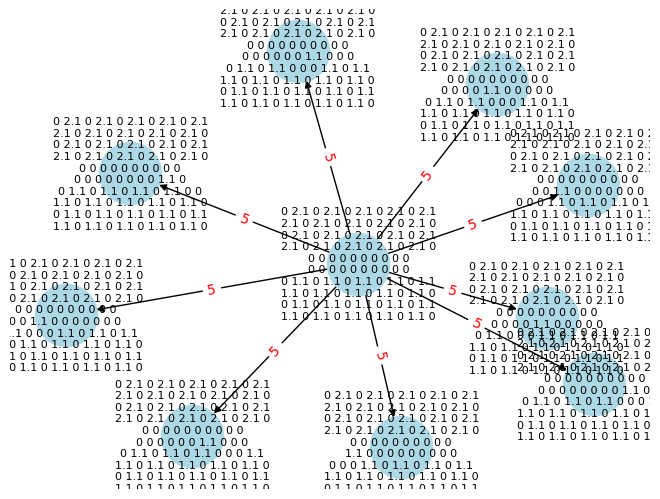

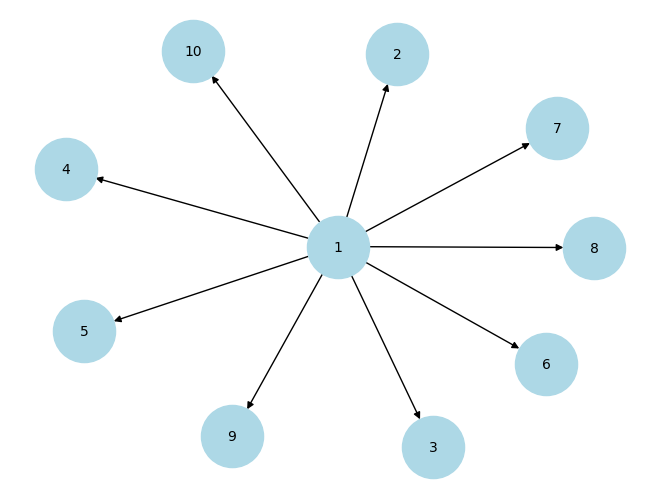

In [249]:

ia = IA()

ia.tree()


Nœud 1: Tableau associé =
1 2 3
4 5 6

Nœud 2: Tableau associé =
7 8
9 10
11 12

Arête (1 -> 2): Poids = 5


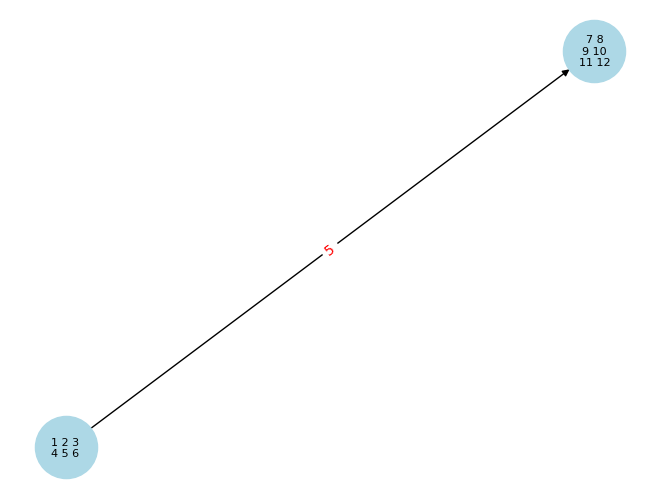

In [44]:


# Créer le graphe
Tree = nx.DiGraph()

# Ajouter des nœuds avec des tableaux 2D comme attributs
Tree.add_node(1, data=[[1, 2, 3], [4, 5, 6]])
Tree.add_node(2, data=[[7, 8], [9, 10], [11, 12]])

# Ajouter une arête avec un poids
Tree.add_edge(1, 2, weight=5)

# Parcourir les nœuds et afficher les tableaux 2D
for node, attributes in Tree.nodes(data=True):
    tableau_2d = attributes['data']
    tableau_str = "\n".join([" ".join(map(str, row)) for row in tableau_2d])
    print(f"Nœud {node}: Tableau associé =\n{tableau_str}\n")

# Afficher les poids des arêtes dans la console
for u, v, attributes in Tree.edges(data=True):
    print(f"Arête ({u} -> {v}): Poids = {attributes['weight']}")

# Créer un dictionnaire de labels pour les nœuds avec des tableaux 2D
node_labels = {
    node: "\n".join([" ".join(map(str, row)) for row in attributes['data']])
    for node, attributes in Tree.nodes(data=True)
}

# Créer un dictionnaire de labels pour les arêtes (poids)
edge_labels = nx.get_edge_attributes(Tree, 'weight')

# Dessiner le graphe
pos = nx.spring_layout(Tree)
nx.draw(Tree, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=2000, font_size=8)

# Ajouter les labels des arêtes (poids)
nx.draw_networkx_edge_labels(Tree, pos, edge_labels=edge_labels, font_color='red')

plt.show()


In [105]:
class Dame:
    def __init__(self):
        self.plateau = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]  # Plateau initialisé

    def afficher_plateau(self):
        for ligne in self.plateau:
            print(ligne)

    def modifier_plateau(self, nouveau_plateau):
        self.plateau = nouveau_plateau


class IA(Dame):


    def mettre_a_jour_plateau(self, nouveau_plateau):
        # Utilisation de la méthode de la classe parente pour modifier l'attribut plateau
        self.modifier_plateau(nouveau_plateau)


# Test
ia = IA()
print("Plateau initial dans IA:")
ia.afficher_plateau()

# Modification du plateau via IA
nouveau_plateau = [[2, 2, 2], [2, 2, 2], [2, 2, 2]]
ia.mettre_a_jour_plateau(nouveau_plateau)

print("\nPlateau après modification dans IA:")
ia.afficher_plateau()


Plateau initial dans IA:
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]

Plateau après modification dans IA:
[2, 2, 2]
[2, 2, 2]
[2, 2, 2]
